## Spotify

In [174]:
import pandas as pd 
spotify=pd.read_excel('/Users/atefeh/Downloads/spotify-2023.xlsx')
spotify.info()

# check missing value
spotify.isnull().sum()

# Fill NA
spotify["in_shazam_charts"].fillna(0, inplace = True)


# Remove non-numeric values from 'streams' column and convert to integer

spotify['streams']=spotify['streams'].astype('int64')
spotify['track_name']=spotify['track_name'].astype('str')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    int64  
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int64  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    float64
 14  bpm                   952 non-null    int64  
 15  key                   8

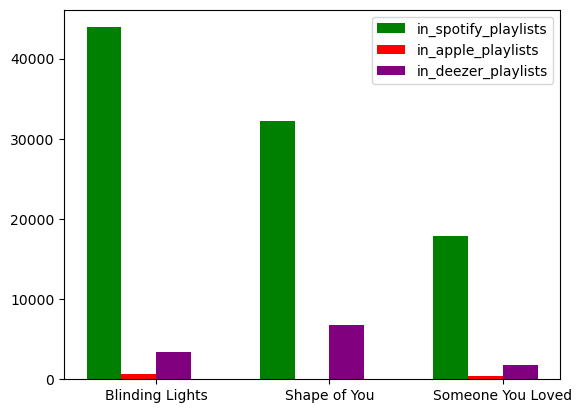

In [196]:
import numpy as np
import matplotlib.pylab as plt
data_playlist=spotify[['in_spotify_playlists','in_apple_playlists','in_deezer_playlists','track_name','artist(s)_name' , 'streams']]
top_playlist=data_playlist.sort_values(by='streams' , ascending=False).head(3)
index=np.arange(len(top_playlist['in_spotify_playlists']))


plt.bar(index,top_playlist['in_spotify_playlists'],label='in_spotify_playlists',color='green',width=0.2)
plt.bar(index+0.2,top_playlist['in_apple_playlists'],label='in_apple_playlists',color='red',width=0.2)
plt.bar(index+0.4,top_playlist['in_deezer_playlists'],label='in_deezer_playlists',color='purple',width=0.2)
plt.legend()
plt.xticks(index+0.3,top_playlist['track_name'])
plt.show()


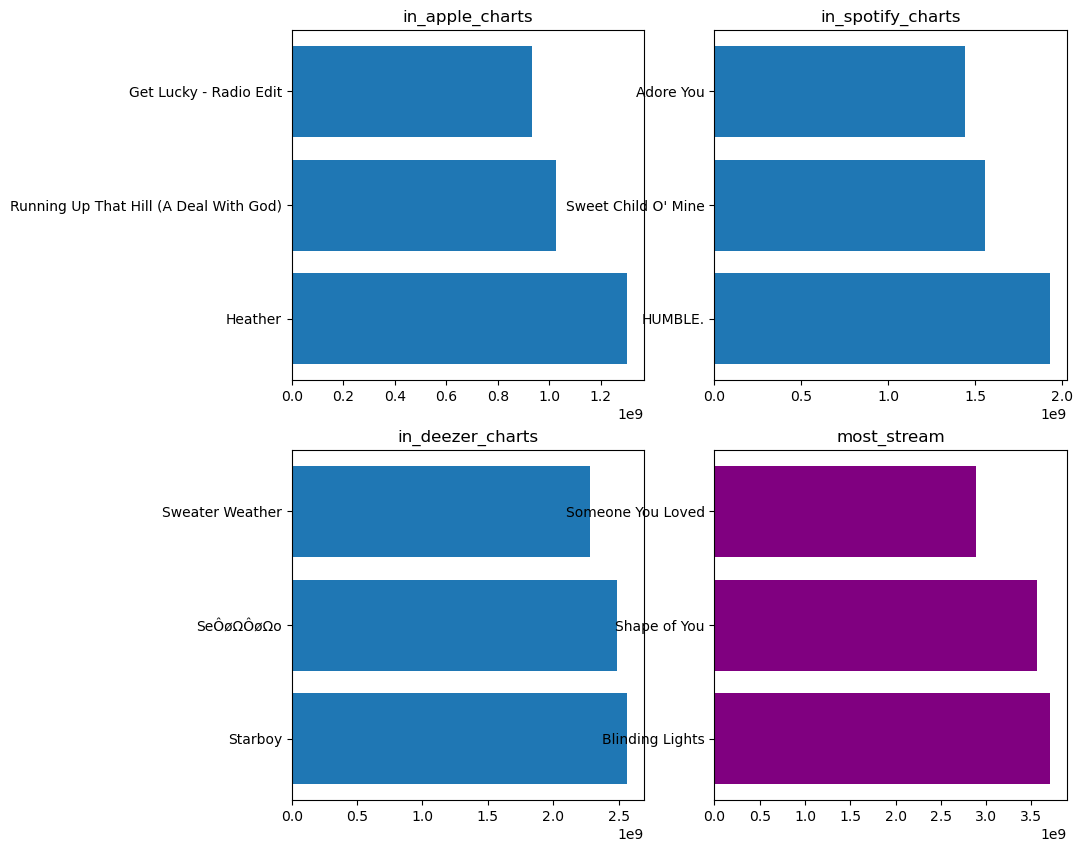

In [197]:
# Platform comparison: Compare the song's popularity across different music platforms.

apple_chart=spotify[['in_apple_charts','track_name','artist(s)_name' , 'streams']]
in_apple_charts=apple_chart[apple_chart['in_apple_charts'] == 1].sort_values(by='streams',ascending=False).head(3)

spotify_chart=spotify[['in_spotify_charts','track_name','artist(s)_name' , 'streams']]
in_spotify_charts=spotify_chart[spotify_chart['in_spotify_charts']==1].sort_values(by='streams',ascending=False).head(3)

deezer_chart=spotify[['in_deezer_charts','track_name','artist(s)_name' , 'streams']]
in_deezer_charts=deezer_chart[deezer_chart['in_deezer_charts']==1].sort_values(by='streams',ascending=False).head(3)


favorites_df = spotify[['track_name','artist(s)_name' , 'streams']]
most_stream = favorites_df.sort_values(by='streams', ascending=False).head(3)


# Create a figure with four subplots
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.barh(in_apple_charts['track_name'],in_apple_charts['streams'] )
ax1.set_title('in_apple_charts')

ax2 = fig.add_subplot(2, 2, 2)
ax2.barh(in_spotify_charts['track_name'],in_spotify_charts['streams'] )
ax2.set_title('in_spotify_charts')

ax3 = fig.add_subplot(2, 2, 3)
ax3.barh(in_deezer_charts['track_name'],in_deezer_charts['streams'] )
ax3.set_title('in_deezer_charts')

ax4 = fig.add_subplot(2, 2, 4)
ax4.barh(most_stream['track_name'] , most_stream['streams'], color='purple' )
ax4.set_title('most_stream')



plt.show()


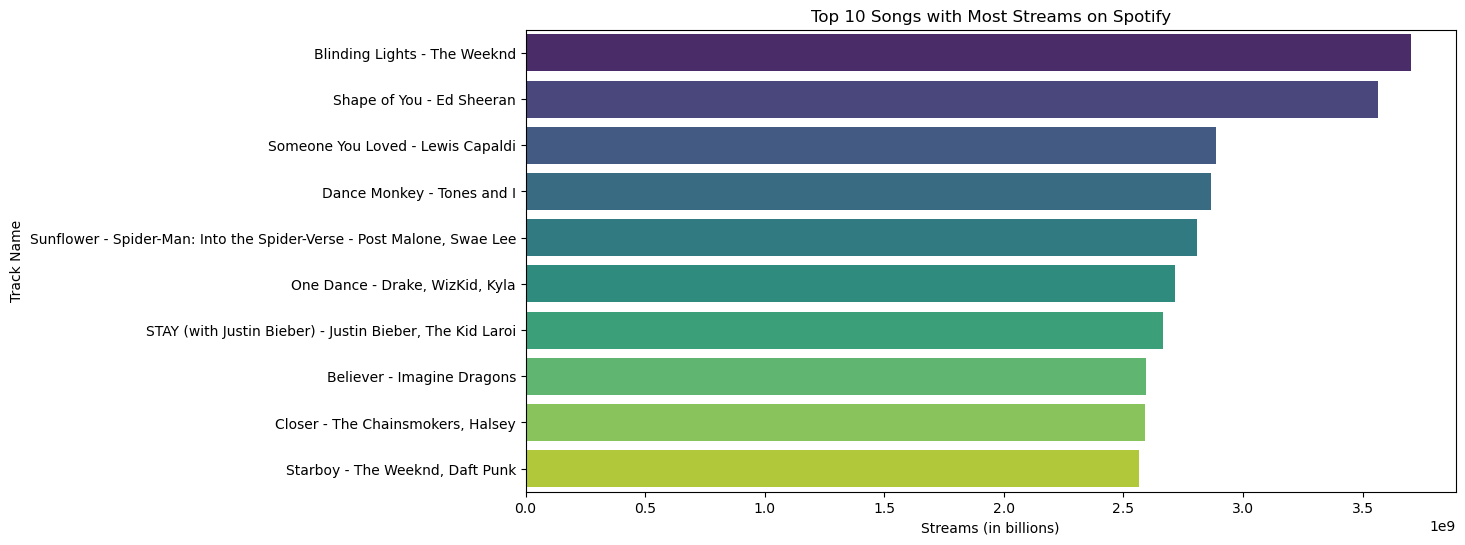

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.7 billion
179,Shape of You,Ed Sheeran,3.6 billion
86,Someone You Loved,Lewis Capaldi,2.9 billion
619,Dance Monkey,Tones and I,2.9 billion
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.8 billion
162,One Dance,"Drake, WizKid, Kyla",2.7 billion
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.7 billion
140,Believer,Imagine Dragons,2.6 billion
724,Closer,"The Chainsmokers, Halsey",2.6 billion
48,Starboy,"The Weeknd, Daft Punk",2.6 billion


In [199]:
# Top 10 Songs with Most Streams on Spotify
import matplotlib.pyplot as plt
import seaborn as sns


spotify['track_name']=spotify['track_name'].astype('str')
spotify['artist(s)_name']=spotify['artist(s)_name'].astype('str')
spotify['track_artist'] = spotify['track_name'] + " - " + spotify['artist(s)_name']

top_songs_spotify=spotify.sort_values(by='streams', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_songs_spotify['streams'], y=top_songs_spotify['track_artist'], palette='viridis')
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with Most Streams on Spotify')

plt.show()

def format_as_billion(value):
    return f"{value} billion"

top_songs_spotify['streams']=round(top_songs_spotify['streams']/1000000000 , 1).apply(format_as_billion)
table_top_songs_spotify=top_songs_spotify[['track_name','artist(s)_name' , 'streams']]
table_top_songs_spotify

/Users/atefeh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


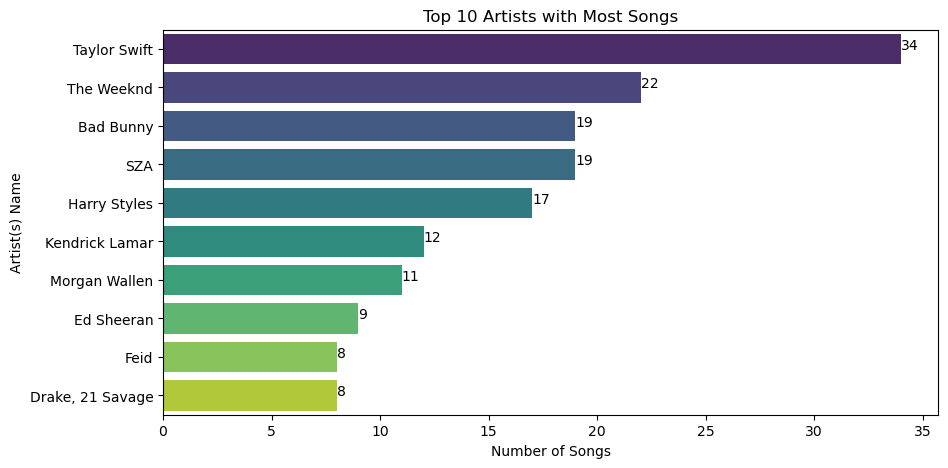

Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Feid                 8
Drake, 21 Savage     8
Name: artist(s)_name, dtype: int64


In [200]:
# Top 10 Artists with Most Songs

top_artist=spotify['artist(s)_name'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(top_artist.values ,top_artist.index ,  palette='viridis')
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 10 Artists with Most Songs')
for index, value in enumerate(top_artist.values): # Show the count above each bar
	plt.text(value, index , str(value))
plt.show()

print(top_artist)


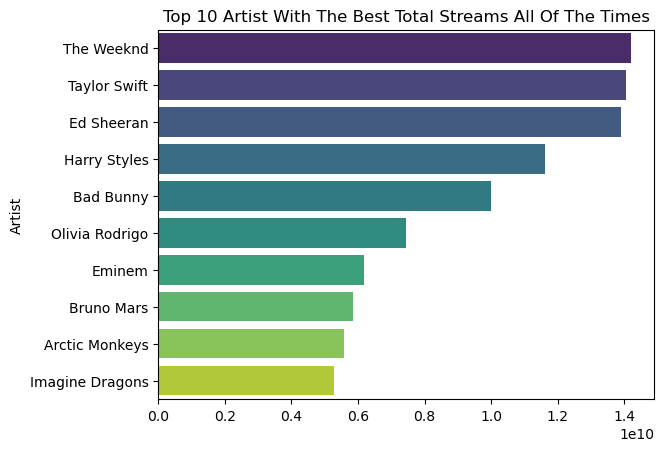

In [201]:
# Top 10 Artist With The Best Total Streams All Of The Times

most_stream_artist=spotify.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)
sns.barplot(x = most_stream_artist.values, y = most_stream_artist.index , palette='viridis')
plt.title("Top 10 Artist With The Best Total Streams All Of The Times")
plt.ylabel("Artist")
plt.show()

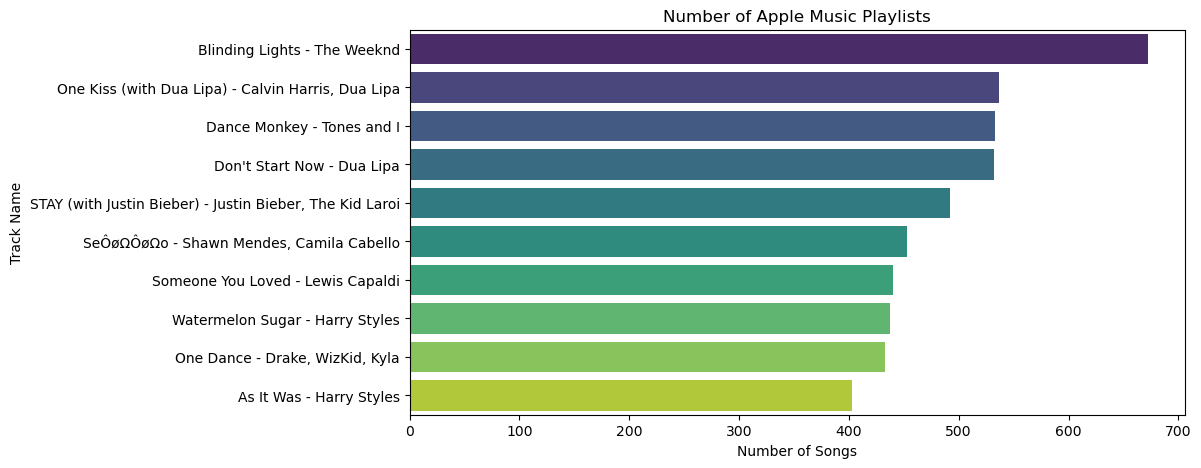

,track_name,artist(s)_name,in_apple_playlists
55,Blinding Lights,The Weeknd,672
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",537
619,Dance Monkey,Tones and I,533
407,Don't Start Now,Dua Lipa,532
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",492
692,SeÔøΩÔøΩo,"Shawn Mendes, Camila Cabello",453
86,Someone You Loved,Lewis Capaldi,440
127,Watermelon Sugar,Harry Styles,437
162,One Dance,"Drake, WizKid, Kyla",433
14,As It Was,Harry Styles,403


In [202]:
# Top 10 songs with highest presence in Apple Music playlists
top_apple_playlist=spotify.sort_values(by='in_apple_playlists' , ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_apple_playlist['in_apple_playlists'] , y =top_apple_playlist['track_artist'], palette='viridis' )
plt.xlabel('Number of Songs')
plt.ylabel('Track Name')
plt.title('Number of Apple Music Playlists')
plt.show()
top_apple_playlist[['track_name', 'artist(s)_name','in_apple_playlists']]

Text(0.5, 1.0, 'THE BEST SONGS in 2023')

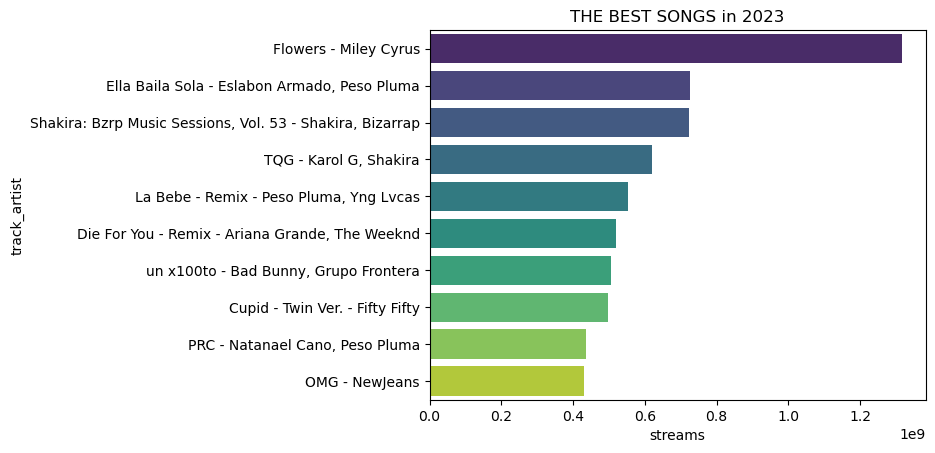

In [203]:
# THE BEST SONGS in 2023
best_2023=spotify[spotify['released_year']==2023].sort_values(by='streams' , ascending=False).head(10)

sns.barplot(x='streams' , y= 'track_artist' , data=best_2023 , palette='viridis')
plt.title('THE BEST SONGS in 2023')

/Users/atefeh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


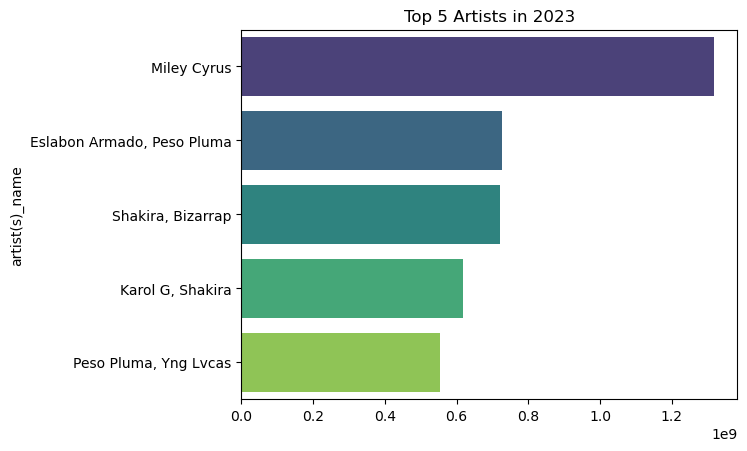

In [204]:
# Top artist in 2023
top_artist=best_2023.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(5)
sns.barplot( top_artist.values,top_artist.index, palette='viridis' )
plt.title("Top 5 Artists in 2023")
plt.show()

/Users/atefeh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='streams'>

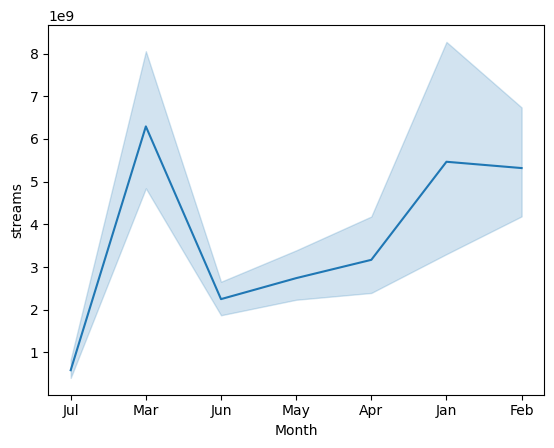

In [222]:
import calendar
best_2023=spotify[spotify['released_year']==2023]
spotify['Month'] = spotify['released_month'].apply(lambda x: calendar.month_abbr[x])
sns.lineplot(best_2023['Month'], best_2023['streams'] , estimator = "sum" )


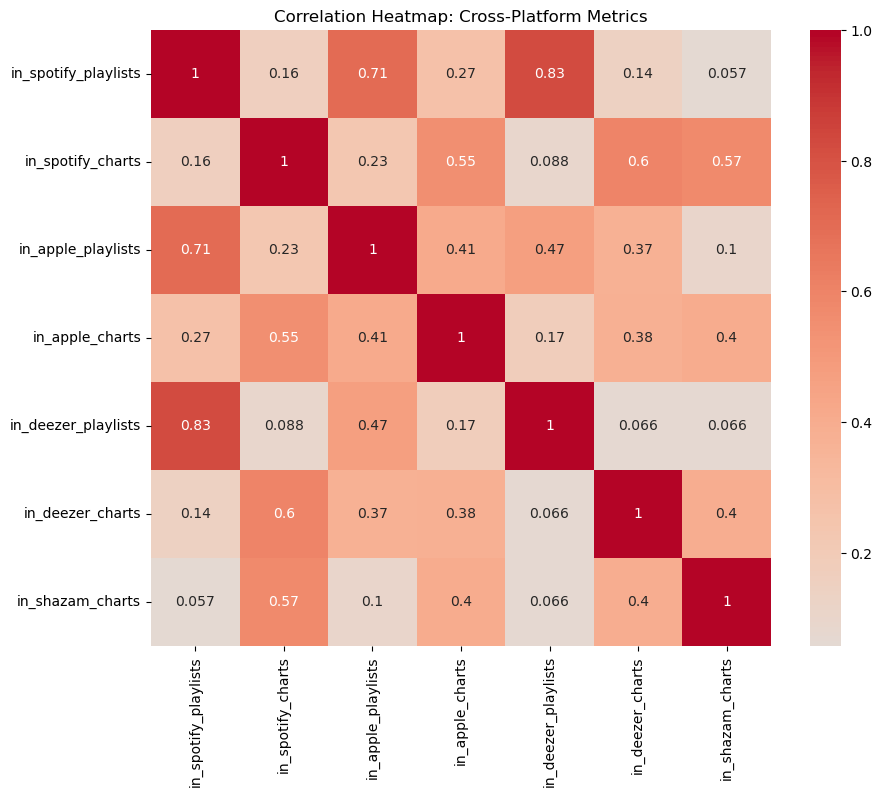

In [223]:
# Select columns for cross-platform metrics
cross_platform_columns = [
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'
]
correlation_matrix = spotify[cross_platform_columns].corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Cross-Platform Metrics')
plt.show()

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features. 
we can see in the map below that there is little to no correlation between the length of a car and mpg (-0.015), though a high correlation between Horsepower and Torque (-0.97, -0.98). 

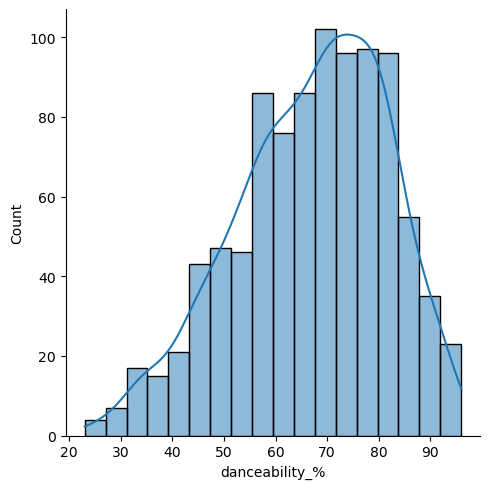

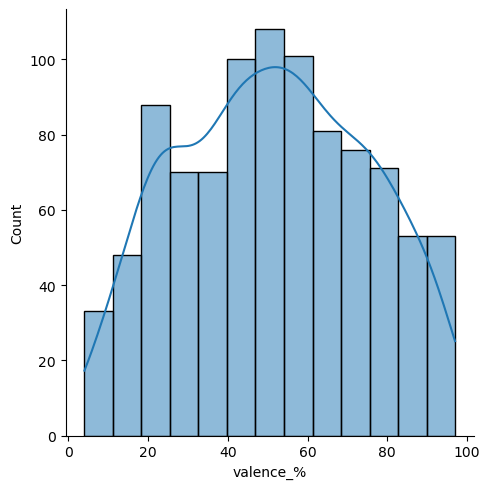

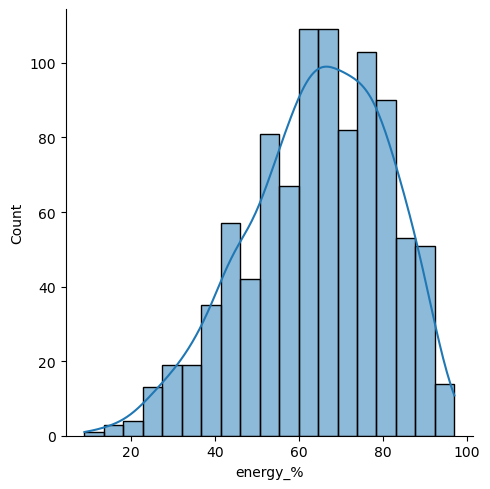

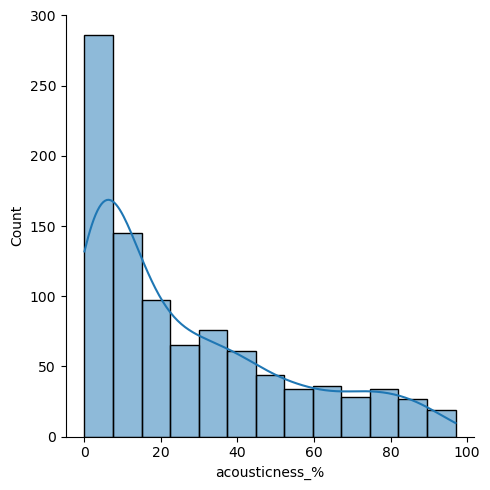

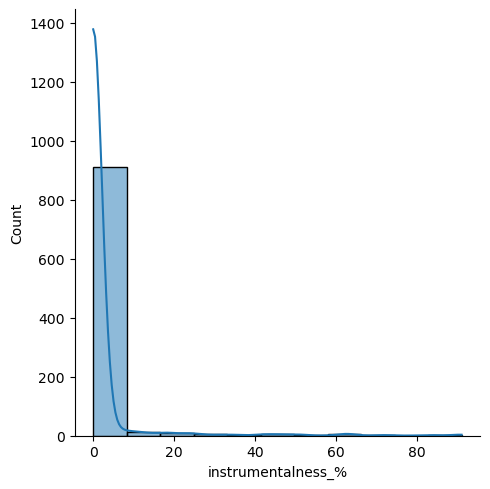

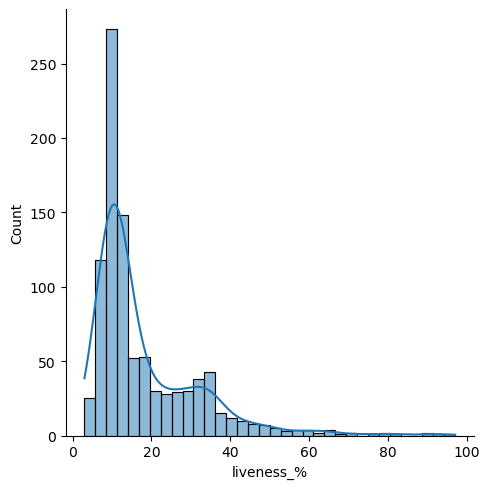

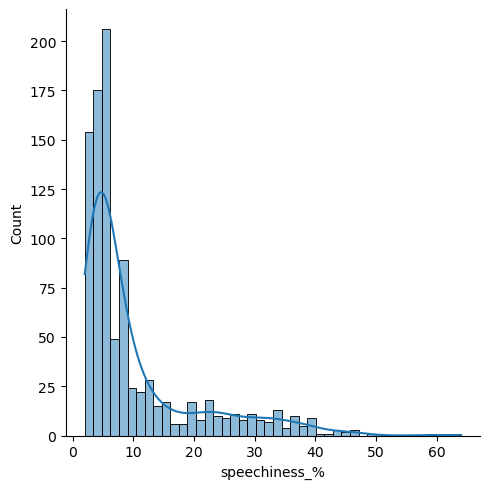

In [224]:
#  distribution plots
music_genre = ['danceability_%' ,	'valence_%'	, 'energy_%' , 'acousticness_%' , 'instrumentalness_%','liveness_%','speechiness_%']
([sns.displot(spotify[i] ,kde=True) for i in music_genre])

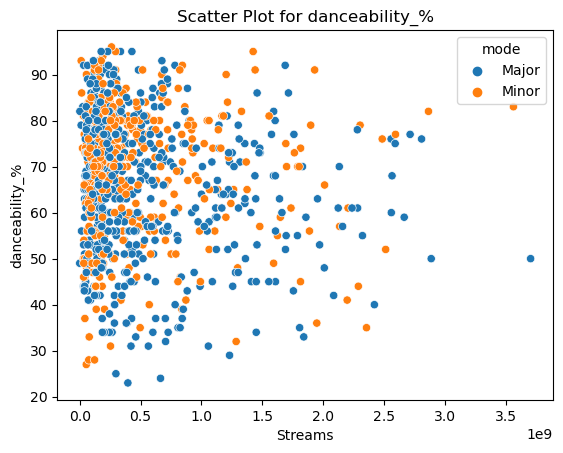

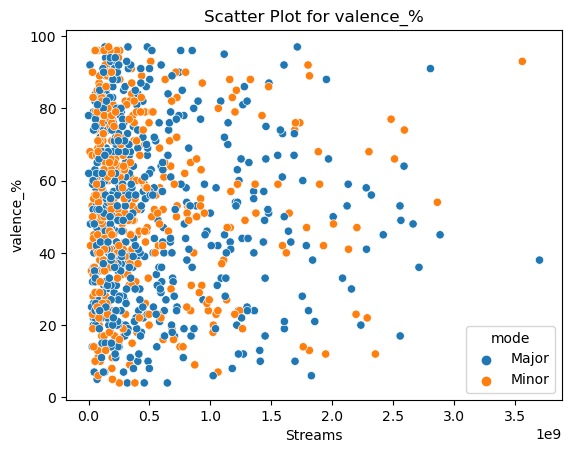

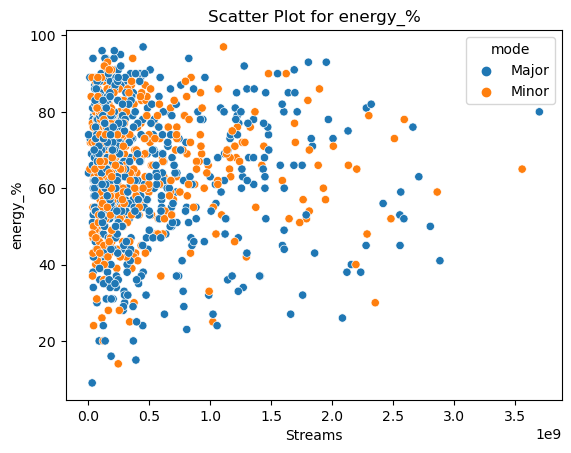

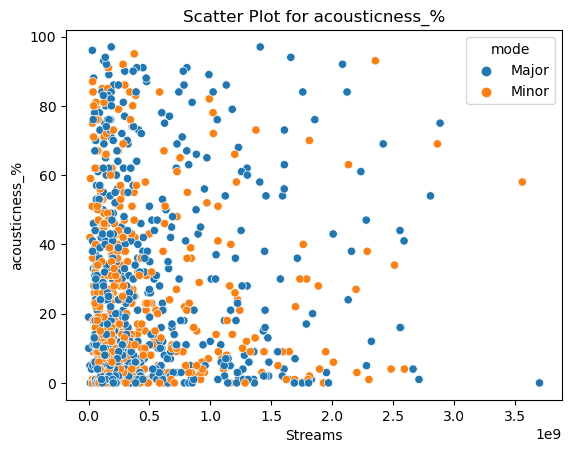

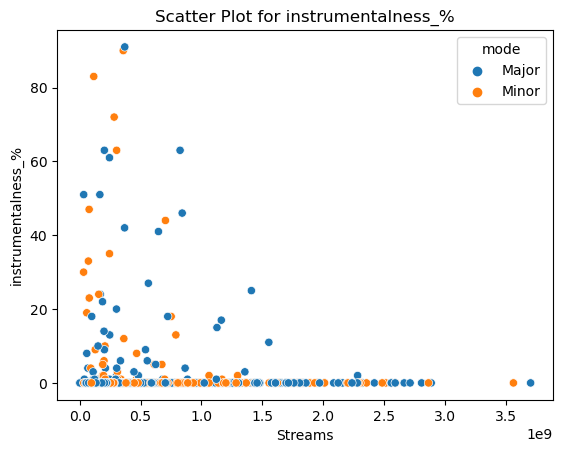

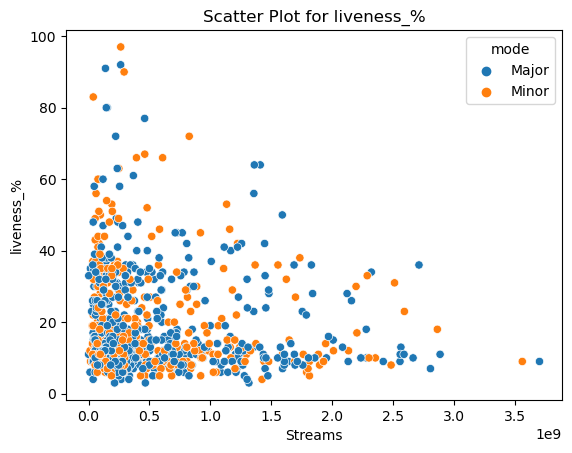

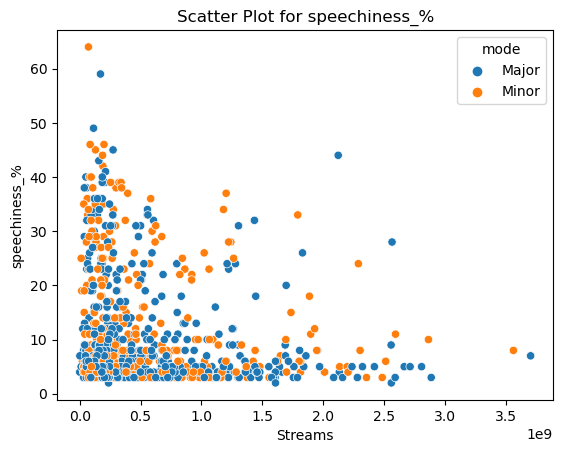

In [225]:
music_genre = ['danceability_%' ,	'valence_%'	, 'energy_%' , 'acousticness_%' , 'instrumentalness_%','liveness_%','speechiness_%']

for i in music_genre:
    sns.scatterplot(x=spotify['streams'], y=spotify[i] , hue=spotify['mode'])
    plt.title(f'Scatter Plot for {i}')
    plt.xlabel('Streams')
    plt.ylabel(i)
    plt.show()

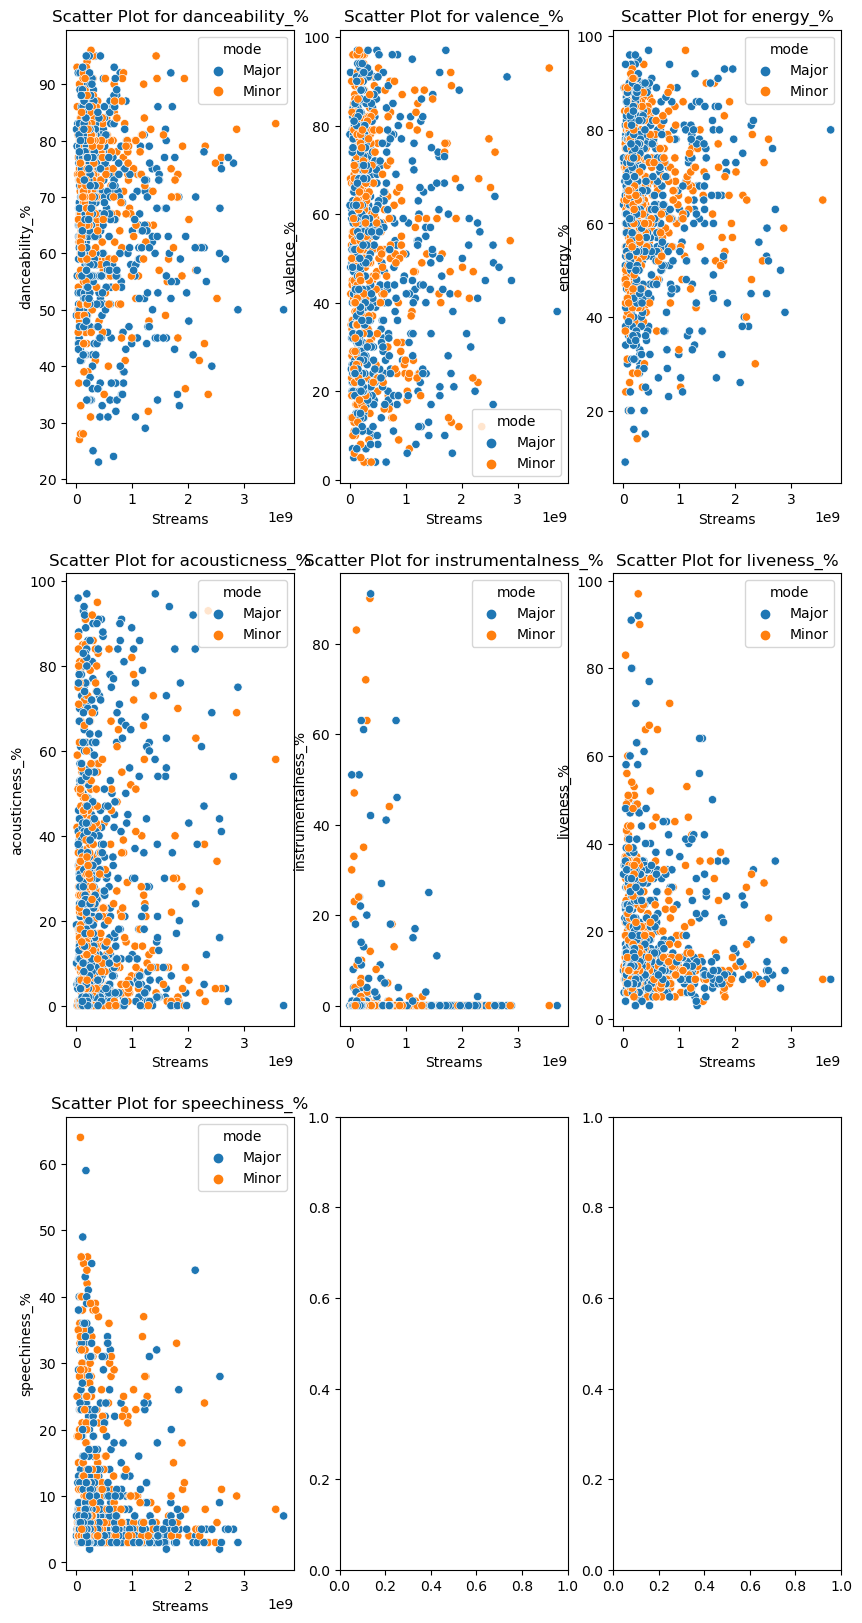

In [226]:
music_genre = ['danceability_%' ,	'valence_%'	, 'energy_%' , 'acousticness_%' , 'instrumentalness_%','liveness_%','speechiness_%']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, var in enumerate(music_genre):
    sns.scatterplot(x="streams", y=var, hue="mode", data=spotify , ax=axes[i])
    axes[i].set_title(f'Scatter Plot for {var}')
    axes[i].set_xlabel('Streams')
    axes[i].set_ylabel(var)

plt.show()

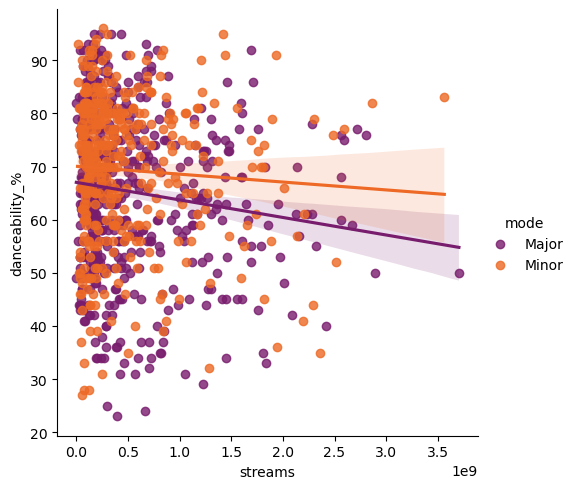

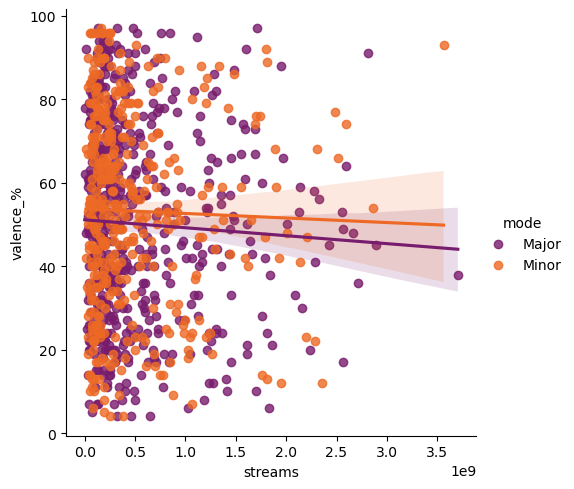

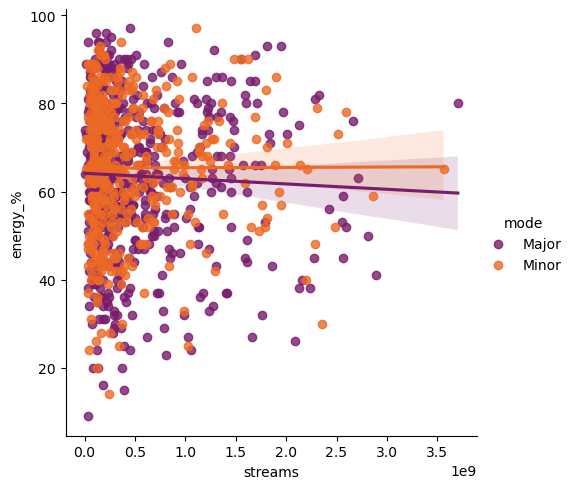

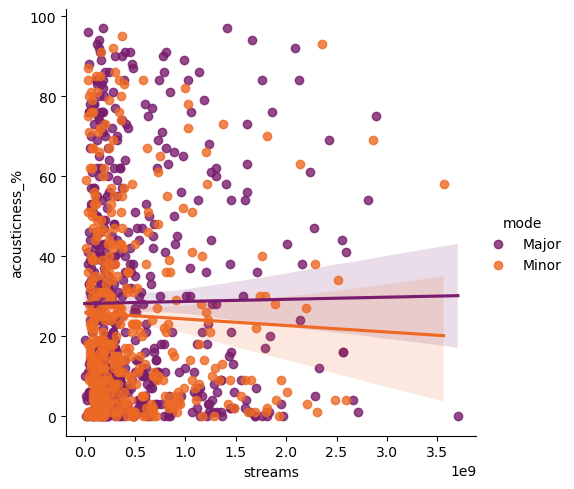

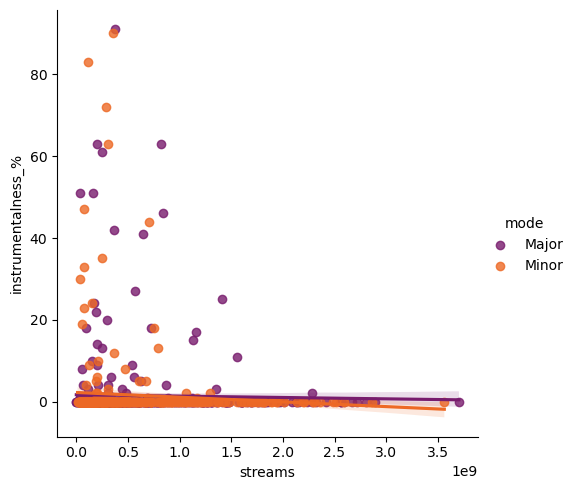

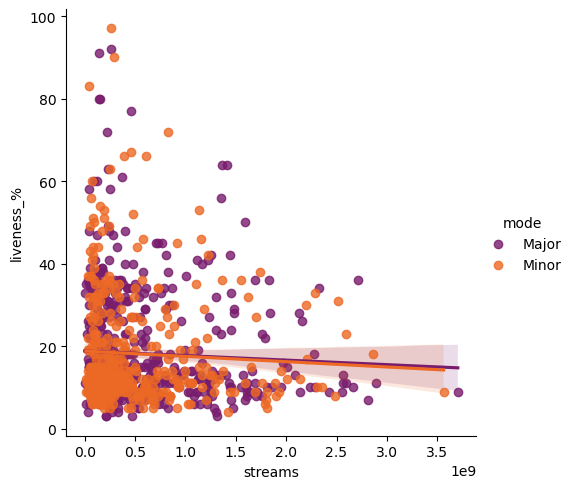

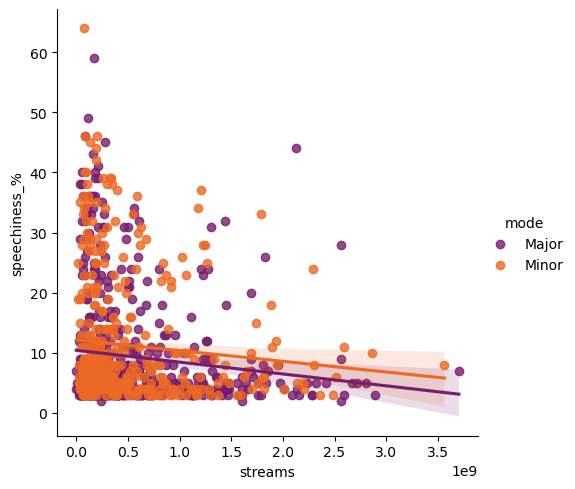

In [227]:
# Create scatter plots with regression lines 
([sns.lmplot(x='streams' , y = i ,hue= 'mode' , data=spotify , palette='inferno' ) for i in music_genre])


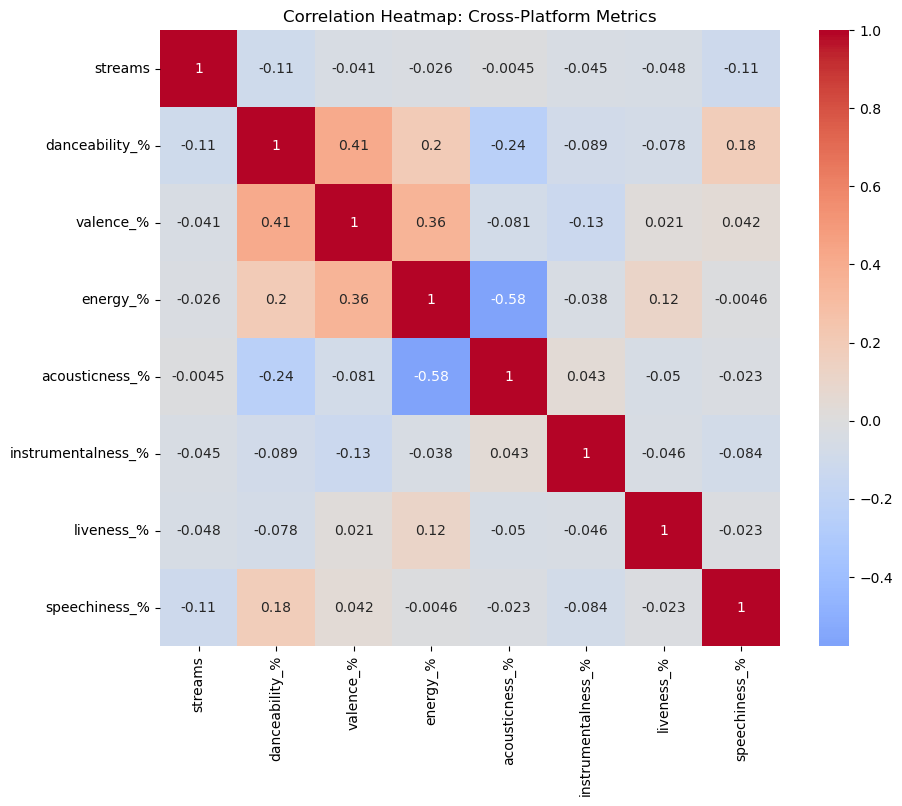

In [228]:
# Select columns for cross-platform metrics
music_genre = ['streams','danceability_%' ,	'valence_%'	, 'energy_%' , 'acousticness_%' , 'instrumentalness_%','liveness_%','speechiness_%']

correlation_matrix = spotify[music_genre].corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Cross-Platform Metrics')
plt.show()

# There is a significant inverse relationship between acoustics and energy.



<AxesSubplot:xlabel='streams', ylabel='Month'>

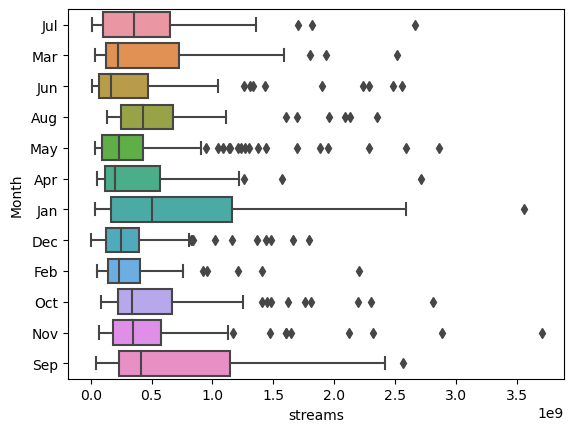

In [229]:
# How to Get Month Name from Month Number
import calendar
spotify['Month'] = spotify['released_month'].apply(lambda x: calendar.month_abbr[x])
spotify['Month'].value_counts()

sns.boxplot( x='streams' ,y='Month',data=spotify )
# Average stream is highest in January. But "most streamed song" is released in November.


In [230]:
spotify[spotify['Month']=='Nov'].sort_values(by='streams' ,ascending=False)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_artist,Month
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,Major,50,38,80,0,0,9,7,Blinding Lights - The Weeknd,Nov
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,Major,50,45,41,75,0,11,3,Someone You Loved - Lewis Capaldi,Nov
127,Watermelon Sugar,Harry Styles,1,2019,11,17,21915,34,2322580122,437,...,Major,55,56,82,12,0,34,5,Watermelon Sugar - Harry Styles,Nov
761,Love Yourself,Justin Bieber,1,2015,11,9,22730,5,2123309722,289,...,Major,61,53,38,84,0,28,44,Love Yourself - Justin Bieber,Nov
47,Die For You,The Weeknd,1,2016,11,24,2483,59,1647990401,68,...,Minor,59,51,52,9,0,15,7,Die For You - The Weeknd,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,Minor,61,32,67,15,0,11,5,Alone - Burna Boy,Nov
944,BackOutsideBoyz,Drake,1,2022,11,4,1045,0,93367537,8,...,Minor,85,40,43,4,0,39,32,BackOutsideBoyz - Drake,Nov
947,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,Major,60,24,39,57,0,8,3,My Mind & Me - Selena Gomez,Nov
949,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,Major,80,81,67,4,0,8,6,"A Veces (feat. Feid) - Feid, Paulo Londra",Nov


(2014.0, 2023.0)

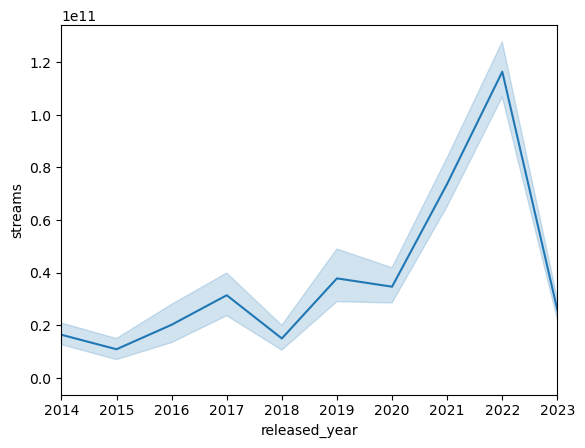

In [231]:
sns.lineplot(x= 'released_year' , y ='streams' , data=spotify , estimator = "sum" )
plt.xlim(2014 , 2023)

# another method if you don't want to use estimator = "sum" .
# a=spotify.groupby('released_year')['streams'].sum().sort_values( ascending = False)
# sns.lineplot(a.index , a.values  )
# plt.xlim(2014 , 2023)

In [232]:
# You want song information only related to 2014 , 2020 , 2023 , 2013

year = [2014, 2013, 2023]
song_info = spotify[spotify['released_year'].isin(year)]


In [233]:
Taylor_Swift = spotify[spotify['artist(s)_name']=='Taylor Swift']
Taylor_Swift.head(5)
#Taylor_Swift.describe()

# we can conclude that on average, about 60% of Taylor's tracks invite you to dance .
# Taylor Swift's songs are a magical blend of danceable tracks and emotional tales

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_artist,Month
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,Cruel Summer - Taylor Swift,Aug
21,I Can See You (TaylorÔøΩÔøΩÔøΩs Version) (From...,Taylor Swift,1,2023,7,7,516,38,52135248,73,...,Major,69,82,76,6,0,6,3,I Can See You (TaylorÔøΩÔøΩÔøΩs Version) (From...,Jul
33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,999748277,242,...,Major,64,51,63,12,0,19,5,Anti-Hero - Taylor Swift,Oct
37,Blank Space,Taylor Swift,1,2014,1,1,11434,53,1355959075,154,...,Major,75,57,68,9,0,13,6,Blank Space - Taylor Swift,Jan
38,Style,Taylor Swift,1,2014,1,1,7830,42,786181836,94,...,Major,60,48,79,0,0,12,4,Style - Taylor Swift,Jan


In [234]:
Taylor_Swift['in_spotify_playlists'].describe()
# On average, Taylor is in 3,911 playlists of spotify .

count       34.000000
mean      3911.000000
std       4309.570224
min         86.000000
25%       1334.500000
50%       2420.500000
75%       4815.000000
max      21335.000000
Name: in_spotify_playlists, dtype: float64

In [235]:
spotify.describe(include=['O'])
# include=['O'] is used to include columns with data type "object." 


,track_name,artist(s)_name,key,mode,track_artist,Month
count,952,952,857,952,952,952
unique,942,644,11,2,948,12
top,Take My Breath,Taylor Swift,C#,Major,SNAP - Rosa Linn,Jan
freq,2,34,120,549,2,133


In [236]:
select_column=[['released_month' ,'artist(s)_name' ]]
[spotify[col].value_counts() for col in select_column]


[released_month  artist(s)_name
 12              SZA               18
 5               Bad Bunny         16
 10              Taylor Swift      15
 1               The Weeknd        13
 5               Harry Styles      12
                                   ..
 4               PSY, Suga          1
                 Paulo Londra       1
                 Polo G             1
                 Post Malone        1
 12              Yng Lvcas          1
 Length: 781, dtype: int64]